# Paper - Example 2

In [1]:
# Import the pyKasso and numpy packages
import pykasso as pk
import numpy as np

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 0,
    'y0': 0,
    'z0': 0,
    'nx': 100,
    'ny': 100,
    'nz': 50,
    'dx': 10,
    'dy': 10,
    'dz': 10,
}

# Declare the project parameters
app.new_project(project_name='example_02', grid_parameters=grid_parameters)

In [2]:
extent = app.project.grid.extent
imshow_options = {'extent': extent}

# Construct the bedrock elevation
bedrock = np.linspace(300, 100, 100)
bedrock = np.repeat(bedrock[:, np.newaxis], 100, axis=1)
im01 = app.visualizer.mpl_plot_array_2D(bedrock, imshow_options=imshow_options)
im01.savefig('fig/example_02_bedrock')

# Construct the water level
grid_shape = app.project.grid.shape[:2]
water_level = np.full(grid_shape, 250)
im02 = app.visualizer.mpl_plot_array_2D(water_level, imshow_options=imshow_options)
im02.savefig('fig/example_02_water_level')

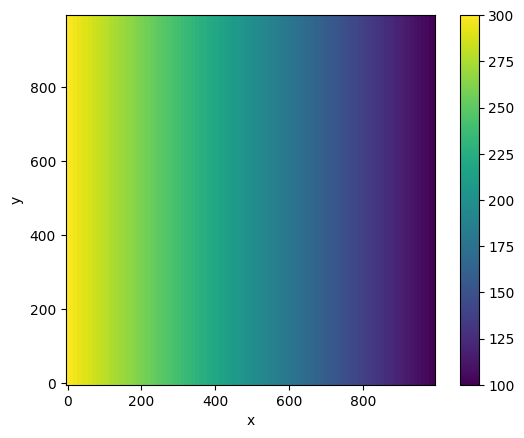

In [3]:
im01

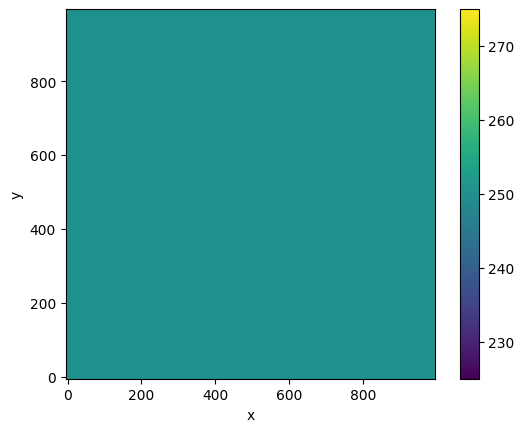

In [4]:
im02

In [5]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 1
    },
    'domain' : {
        'bedrock' : bedrock,
        'water_level' : water_level
    },
    'outlets' : {
        'seed' : 1,
        'number' : 1,
        'importance': [1],
    },
    'inlets' : {
        'seed' : 1,
        'number': 10,
        'importance': [1],
        'per_outlet': [1],
    }
}

In [6]:
# Compute 1 simulation with isotropic and 1 simulation with anisotropic fast marching algortihm
model_parameters['sks']['algorithm'] = 'Isotropic3'
app.model.generate(model_parameters=model_parameters)
model_parameters['sks']['algorithm'] = 'Riemann3'
app.model.generate(model_parameters=model_parameters)

A


In [7]:
# Plot the simulated karstic networks
im03 = app.visualizer.mpl_plot_karstic_network(n_sim=0)
im03.savefig('fig/example_02_isotropic')

im04 = app.visualizer.mpl_plot_karstic_network(n_sim=1)
im04.savefig('fig/example_02_anisotropic')

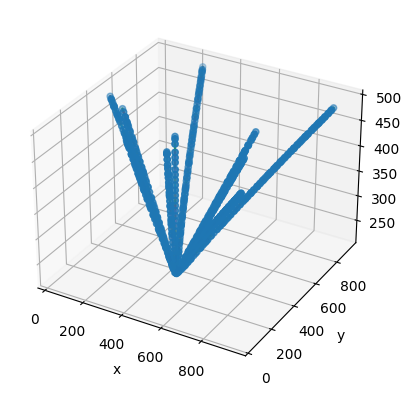

In [8]:
im03

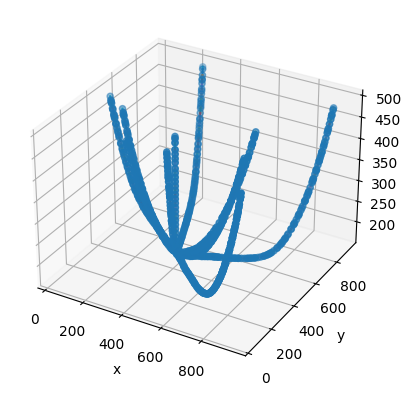

In [9]:
im04

In [15]:
app.visualizer.pv_show(simulations=[0, 1], features=['karst', 'karst'])

KeyError: 'inlets'